# Predict survival on the Titanic
In this Lab, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy

### Dataset
The dataset contains 891 observations of 12 variables:
* **PassengerId**: Unique ID for each passenger
* **Survived**: Survival (0 = No; 1 = Yes)
* **Pclass**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* **Name**: Name
* **Sex**: Sex
* **Age**: Age
* **Sibsp**: Number of Siblings/Spouses Aboard
* **Parch**: Number of Parents/Children Aboard
* **Ticket**: Ticket Number
* **Fare**: Passenger Fare
* **Cabin**: Cabin
* **Embarked** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [359]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [360]:
titanic = pd.read_csv("titanic.csv" )
titanic.drop('Cabin', axis=1, inplace=True) # Drop this column because it contains a lot of Nan values
titanic["Age"].fillna(titanic["Age"].median(),inplace=True)
titanic["Embarked"].fillna("S", inplace = True)
print ('survival rate =', titanic.Survived.mean())

survival rate = 0.3838383838383838


## Model training

In [361]:
# Some of the columns don't have predictive power, so let's specify which ones are included for prediction
predictors = ["Pclass", "Sex", "Age", 'SibSp' ,'Parch', "Fare", "Embarked"]  
# We need now to convert text columns in predictors to numerical ones
for col in predictors: # Loop through all columns in predictors
    if titanic[col].dtype == 'object':  # check if column's type is object (text)
        titanic[col] = pd.Categorical(titanic[col]).codes  # convert text to numerical

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [362]:
# Split the data into a training set and a testing set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(titanic[predictors], titanic['Survived'], test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
print ('train accuracy =', clf.score(X_train, y_train))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=5)
print('cross validation accuracy =', scores.mean())

train accuracy = 0.8105939004815409
cross validation accuracy = 0.7901490077087383


 # Decision Trees

Let's start with one single tree

In [363]:
# import from: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# your code here
clf_dt = DecisionTreeClassifier(random_state=1)
## FIT 
clf_dt.fit(X_train, y_train)
## SCORE 
train_score = clf_dt.score(X_train, y_train)
test_score = clf_dt.score(X_test, y_test)
# your code here
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.9887640449438202
test accuracy = 0.7574626865671642


Predictions are obtained in the same way of Logistic Regression

In [364]:
y_pred = clf_dt.predict(X_test)# your code here
print (y_pred)

[1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0
 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0
 0 1 0 1 0 0 0 0 1]


In [365]:
y_prob = clf_dt.predict_proba(X_test)# your code here
print (y_prob)

[[0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.25 0.75]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.5  0.5 ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.8  0.2 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]

Let's play around with some of the decision tree's parameters

In [366]:
# check the sklearn documentation and change the following parameters: max_depth, min_samples_split, min_samples_leaf 
clf_dt = DecisionTreeClassifier(random_state=1, max_depth=5, min_samples_split=15)# your code here)
# your code here
clf_dt.fit(X_train, y_train)
train_score = clf_dt.score(X_train, y_train)
print ('train accuracy =', train_score)# your code here)

# Cross validation
scores_dt = cross_val_score(clf_dt, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=5)# your code here
print('cross validation accuracy =', scores_dt.mean())# your code here)

train accuracy = 0.8812199036918138
cross validation accuracy = 0.8137323847510467


### Plot the decision tree
Set the max_depth parameter in the previous classifier to 3 and leave all the other ones to default values.<br>
Open the tree.dot file in a text editor, copy the piece of code and paste it  [ @ webgraphviz.com](http://webgraphviz.com/)

In [367]:
from sklearn import tree
tree.export_graphviz(clf_dt, out_file='tree.dot')
# As a reminder, these are the predicting features in order
print (dict(zip(range(len(predictors)),predictors)))

{0: 'Pclass', 1: 'Sex', 2: 'Age', 3: 'SibSp', 4: 'Parch', 5: 'Fare', 6: 'Embarked'}


The image should look like the following

In [368]:
from IPython.display import Image
# Image("DT.png")
# import pydot
# (graph, ) = pydot.graph_from_dot_file('tree.dot')
# graph.write_png('test.png')
# Image("test.png")

Predict the survival of a female, Pclass 1 or 2, above age 2.5

In [369]:
passenger1=np.array([1, 0, 3, 0, 0, 0, 0]).reshape([1, -1])# your code here]).reshape(1, -1)
print ('proba =', clf_dt.predict_proba(passenger1))# your code here)
print ('class =', clf_dt.predict(passenger1))# your code here)

proba = [[0.0952381 0.9047619]]
class = [1]


Predict the survival of a male, above age 11.5, Pclass 2 or 3

In [370]:
# passenger2=np.array([# your code here]).reshape(1, -1)
# print ('proba =', # your code here)
# print ('class =', # your code here)

By looking at this decision tree, you can get a sense the relative importance between features. let's see which are the most important ones using the attribute: **feature\_importances_**

In [371]:
feat_imp = pd.DataFrame(clf_dt.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=False)

,Importance
Sex,0.535202
Pclass,0.165342
Age,0.123519
Fare,0.060527
SibSp,0.059734
Embarked,0.043938
Parch,0.011738


As expected, **Parch** and **Fare** are the least important ones because they were not used for splitting, while **Sex** is the most important one since it was used first for splitting. 

# Random Forest
A   [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier from sklearn.ensemble import RandomForestClassifier) is an ensemble of [decision trees](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [372]:
# import from: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
# your code here
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=1)  # by default, 10 trees are used
# your code here
clf_rf.fit(X_train, y_train)
print ('train accuracy =', clf_rf.score(X_train, y_train))# your code here)

# Cross validation
scores_rf = cross_val_score(clf_dt, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=5)# your code here
print('cross validation accuracy =', scores_rf.mean())# your code here)

train accuracy = 0.9743178170144462
cross validation accuracy = 0.8137323847510467


In the same way, you can print the feature importance of all the trees

In [373]:
# your code here
feat_imp = pd.DataFrame(clf_rf.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=False)

,Importance
Age,0.266266
Fare,0.257963
Sex,0.239376
Pclass,0.087316
SibSp,0.061535
Parch,0.054428
Embarked,0.033116


Random forest, like decision trees have a lot of parameters to tune. Usually, performance does not change linearly with parameters. Let's take as an example, the accuracy as a function of number of trees (**n_estimators**)

Text(0.5, 0, 'Number of Trees')

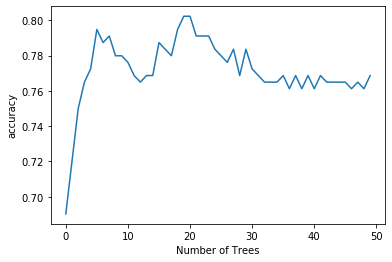

In [374]:
%matplotlib inline
import matplotlib.pyplot as plt

trees=range(50)
accuracy=np.zeros(50)
for idx in range(len(trees)):
    clf_rf=RandomForestClassifier(random_state=1, n_estimators=idx + 1)
    clf_rf.fit(X_train,y_train)
    accuracy[idx]=clf_rf.score(X_test, y_test)  

plt.plot(trees, accuracy)
plt.ylabel('accuracy')
plt.xlabel('Number of Trees')

In the following, try to tune manually the following parameters: **min_samples_leaf, min_samples_split, max_depth, n_estimators** in order to increase cross validation accuracy.

In [375]:
clf_rf = RandomForestClassifier(random_state=1, min_samples_split=13, max_depth=7, n_estimators=25)# your code here)
clf_rf.fit(X_train, y_train)
print ('train accuracy =', clf_rf.score(X_train, y_train))

# Cross validation
scores_rf = cross_val_score(clf_rf, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=5)
print('cross validation accuracy =', scores_rf.mean())

train accuracy = 0.8780096308186196
cross validation accuracy = 0.8249494376702922


This might be a difficult job to do manually. In other way is to search automatically the best combination of different ranges for these parameters. This is done using **Grid Search**

# Grid Search

In [376]:
# Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
# your code here
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf':list(range(1,5)),'min_samples_split':list(range(2,10,2)),
          'n_estimators':list(range(10,50,10))}
clf_rf2=RandomForestClassifier(random_state=1)
clf_gs=GridSearchCV(clf_rf2, params, scoring = 'accuracy',cv=5)
clf_gs.fit(titanic[predictors], titanic["Survived"])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': [1, 2, 3, 4], 'min_samples_split': [2, 4, 6, 8], 'n_estimators': [10, 20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Print the best score

In [377]:
# your code here
clf_gs.best_score_

0.8327721661054994

Print the best parameters

In [378]:
# your code here
clf_gs.best_params_

{'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 30}

Let's use these best parameters and check whether they achieve really the above cv accuracy

In [379]:
clf_rf3 = RandomForestClassifier(random_state=1, min_samples_leaf= 4, min_samples_split= 2, n_estimators= 30)# your code here) 
clf_rf3.fit(X_train, y_train)
print ('train accuracy =', clf_rf3.score(X_train, y_train))

scores_rf3 = cross_val_score(clf_rf3, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=5)
print('cross validation accuracy =',scores_rf3.mean())

train accuracy = 0.8860353130016051
cross validation accuracy = 0.8328209542068248


As you can see, grid search allows you to find the best model parameters to improve your accuracy. Now, we can see the most important features of this last classifier

In [380]:
feat_imp = pd.DataFrame(clf_rf3.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=False)

,Importance
Sex,0.387434
Fare,0.204499
Age,0.147745
Pclass,0.130683
SibSp,0.053662
Parch,0.040667
Embarked,0.035311
